In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import numpy as np


In [5]:
df=pd.read_csv("graduate_admission.csv")

In [6]:
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
#dropping useless columsns
df.drop(columns=["Serial No."],inplace=True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
#Missing values detection
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: ylabel='Research'>

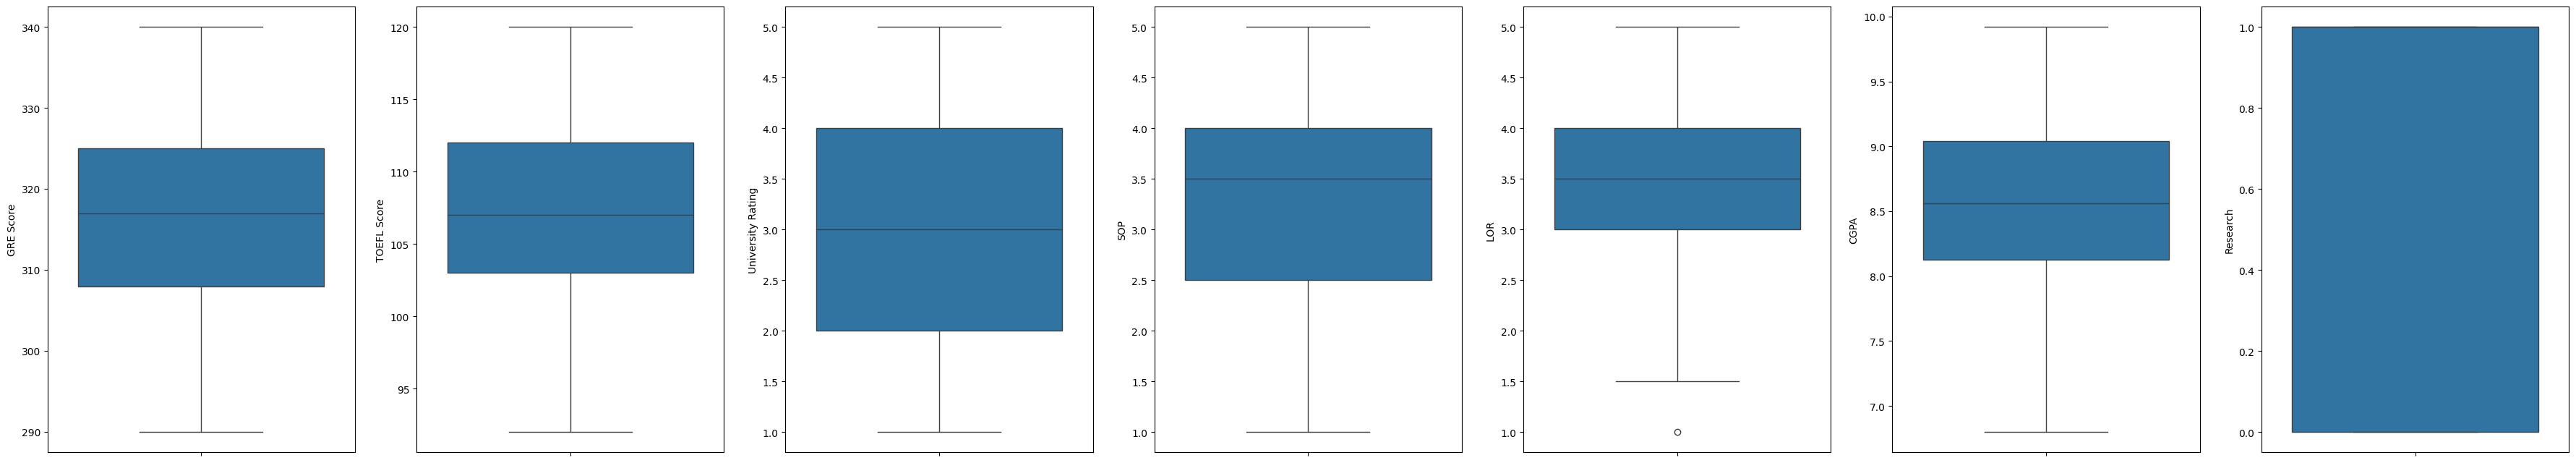

In [17]:
#detecting and fixing the outliers
plt.figure(figsize=(45,8))
plt.subplot(1,7,1)
sns.boxplot(df["GRE Score"])
plt.subplot(1,7,2)
sns.boxplot(df["TOEFL Score"])
plt.subplot(1,7,3)
sns.boxplot(df["University Rating"])
plt.subplot(1,7,4)
sns.boxplot(df["SOP"])
plt.subplot(1,7,5)
sns.boxplot(df["LOR "])
plt.subplot(1,7,6)
sns.boxplot(df["CGPA"])
plt.subplot(1,7,7)
sns.boxplot(df["Research"])



In [22]:
#seperating independent adn dependent variables
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [26]:
X=df.drop(columns="Chance of Admit ")
Y=df["Chance of Admit "]

In [27]:
#training the model
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2,random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
#prediction
Y_pred=rf.predict(X_test)

In [43]:
#evaluation
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

0.004746132449999997
0.06889217989002813


In [44]:
#building an app using streamlit app
import joblib
joblib.dump(rf,"random.pkl")

['random.pkl']